<a href="https://colab.research.google.com/github/harshalgurav/deep-learning-on-churn_modeling/blob/main/DL_on_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#to load dataset
df=pd.read_csv('/content/drive/MyDrive/Deep Learning Notebook/Churn_Modelling.csv')

In [ ]:
#to see first 5 records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#how many rows and columns
df.shape

(10000, 14)

In [ ]:
#to check null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

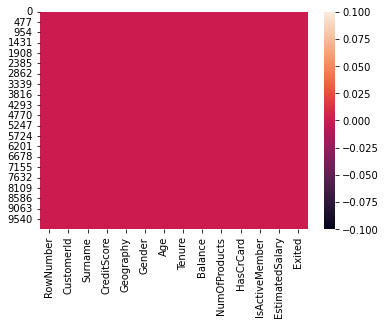

In [ ]:
#visulization
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#check datatype
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#to check duplicate values
df.duplicated().sum()

0

In [ ]:
#to delete unwnted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#how many samples of 1 and 0 in insuranceclaim output variable
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
#randomoversampling
from imblearn.over_sampling import RandomOverSampler

#create object of RandomOverSampler
ros=RandomOverSampler

In [ ]:
#split data into 2 parts
df_num=df.select_dtypes(['float64','int64'])
df_cat=df.select_dtypes('object')

In [ ]:
df_cat

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [ ]:
df_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#applying labelencoder
from sklearn.preprocessing import LabelEncoder
columns=df_cat.columns
print('columns')
for col in columns:
  #create object type of labelencoder 
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])

columns


In [ ]:
df_cat.dtypes

Geography    int64
Gender       int64
dtype: object

In [ ]:
#merge
df_new=pd.concat([df_cat,df_num],axis=1)

In [ ]:
#first we select input and output and then split our data
X=df_new.drop("Exited",axis=1)
Y=df_new["Exited"]

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

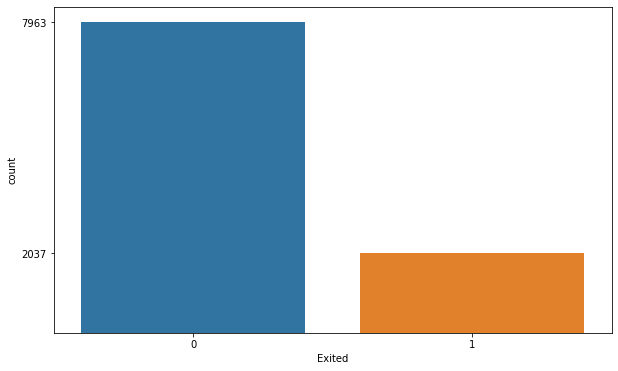

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Exited")
c=df["Exited"].value_counts()
plt.yticks(c)
plt.show()

In [ ]:
#checking before applying ros on training data
Y_train.value_counts()

0    5590
1    1410
Name: Exited, dtype: int64

In [ ]:
#creating object of RandomOverSampler class
ros=RandomOverSampler()

In [ ]:
#applying ros on training data
X_train,Y_train=ros.fit_resample(X_train,Y_train)

In [ ]:
#checking afte applying ros on training data
Y_train.value_counts()

0    5590
1    5590
Name: Exited, dtype: int64

In [ ]:
#same for testing data
#checking before applying ros on testing data
Y_test.value_counts()

0    2373
1     627
Name: Exited, dtype: int64

In [ ]:
#applying ros on testing data
X_test,Y_test=ros.fit_resample(X_test,Y_test)

In [ ]:
#applying ros on testing data
X_test,Y_test=ros.fit_resample(X_test,Y_test)

In [ ]:
#applying scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
#now that our data is balanced, we can build our model

In [ ]:
#create a neural network
import tensorflow as tf
#create object of sequential class
model=tf.keras.models.Sequential([
   tf.keras.layers.Dense(units=10,activation='relu',input_shape=(X.shape[1],)),   #input_dim=7)
   #hidden layer 
   tf.keras.layers.Dense(units=10,activation='relu'), #hiden layer=2
   tf.keras.layers.Dense(units=1,activation='sigmoid') #output laye
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#create early stopping means create a call back
from tensorflow.keras.callbacks import EarlyStopping
callbacks=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
#train the model
trained_model=model.fit(X_train,Y_train,batch_size=28,epochs=3500,validation_data=(X_test,Y_test),callbacks=callbacks)

In [ ]:
print("Traning loss : {} and Training Accuracy : {}",model.evaluate(X_train,Y_train))
print("Testing loss : {} and Testing Accuracy : {}",model.evaluate(X_test,Y_test))

350/350 [==============================] - 1s 1ms/step - loss: 0.4417 - accuracy: 0.7858
Traning loss : {} and Training Accuracy : {} [0.44171595573425293, 0.7857781648635864]
149/149 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7712
Testing loss : {} and Testing Accuracy : {} [0.46793460845947266, 0.771175742149353]


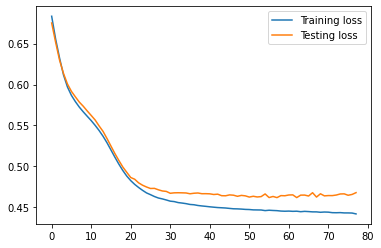

In [ ]:
#visulization testing and training losss
plt.plot(trained_model.history['loss'],label='Training loss')
plt.plot(trained_model.history['val_loss'],label='Testing loss')
plt.legend()
plt.show()

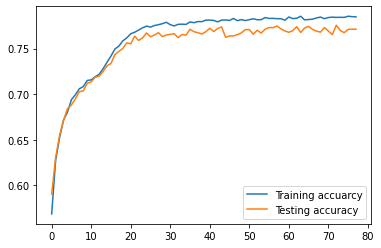

In [ ]:
#visulization testing and training accuracy
plt.plot(trained_model.history['accuracy'],label='Training accuarcy')
plt.plot(trained_model.history['val_accuracy'],label='Testing accuracy')
plt.legend()
plt.show()

In [ ]:
#testing the model with 30% data
Y_pred=model.predict(X_test).round(2)
Y_pred

array([[0.27],
       [0.29],
       [0.25],
       ...,
       [0.87],
       [0.72],
       [0.34]], dtype=float32)

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2373
           1       0.79      0.73      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1925  448]
 [ 647 1726]]


In [ ]:
#create object of sequential class
#create a neutral network
from keras import regularizers
from keras.layers import Dropout
model=tf.keras.models.Sequential([
   tf.keras.layers.Dense(units=1000,activation='relu',input_shape=(X.shape[1],),kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3), #30% neuron deactivation   #first hidden layer 
   tf.keras.layers.Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3), #second hiden layer=2
   tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)) #output class
])

In [ ]:
#compile the model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
trained_model=model.fit(X_train,Y_train,batch_size=28,epochs=3500,validation_data=(X_test,Y_test),callbacks=callbacks)

Epoch 1/3500
400/400 [==============================] - 8s 18ms/step - loss: 10.1111 - accuracy: 0.6686 - val_loss: 9.3370 - val_accuracy: 0.7046
Epoch 2/3500
400/400 [==============================] - 7s 18ms/step - loss: 8.6717 - accuracy: 0.7053 - val_loss: 8.0273 - val_accuracy: 0.7086
Epoch 3/3500
400/400 [==============================] - 7s 18ms/step - loss: 7.4689 - accuracy: 0.7072 - val_loss: 6.9233 - val_accuracy: 0.7162
Epoch 4/3500
400/400 [==============================] - 7s 18ms/step - loss: 6.4485 - accuracy: 0.7165 - val_loss: 5.9841 - val_accuracy: 0.7191
Epoch 5/3500
400/400 [==============================] - 9s 23ms/step - loss: 5.5798 - accuracy: 0.7236 - val_loss: 5.1839 - val_accuracy: 0.7214
Epoch 6/3500
400/400 [==============================] - 7s 17ms/step - loss: 4.8400 - accuracy: 0.7264 - val_loss: 4.5013 - val_accuracy: 0.7246
Epoch 7/3500
400/400 [==============================] - 7s 17ms/step - loss: 4.2088 - accuracy: 0.7332 - val_loss: 3.9190 - val_a

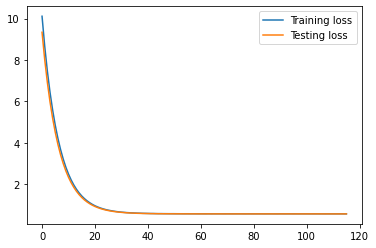

In [ ]:
#visulization testing and training losss
plt.plot(trained_model.history['loss'],label='Training loss')
plt.plot(trained_model.history['val_loss'],label='Testing loss')
plt.legend()
plt.show()

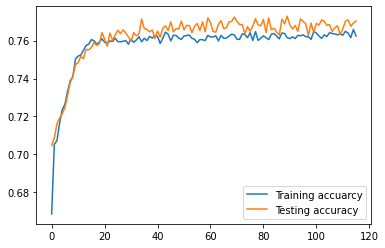

In [ ]:
#visulization testing and training accuracy
plt.plot(trained_model.history['accuracy'],label='Training accuarcy')
plt.plot(trained_model.history['val_accuracy'],label='Testing accuracy')
plt.legend()
plt.show()

In [ ]:
#testing the model with 30% data
Y_pred=model.predict(X_test).round(2)
Y_pred

array([[0.19],
       [0.4 ],
       [0.23],
       ...,
       [0.78],
       [0.55],
       [0.42]], dtype=float32)

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2373
           1       0.77      0.77      0.77      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1829  544]
 [ 556 1817]]
